# **EDA**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,...,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,...,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,...,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,...,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,...,True,True,True,True,True,True,True,True,False,0


In [ ]:
df.drop(['number_outpatient', 'number_emergency', 'number_inpatient'], axis=1, inplace=True)

# **Data Visualization**

## **Two graphs maximum**

In [ ]:
df.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
       'tolbutamide_No', 'pioglitazone_No', 'rosiglitazone_No', 'acarbose

In [ ]:
fig = px.scatter(df, x='time_in_hospital', y='num_lab_procedures', color='readmitted')
fig.show()

In [ ]:
fig = px.scatter(df, x='time_in_hospital', y='num_medications', color='readmitted')
fig.show()

In [ ]:
fig = px.histogram(df, x='diag_1_428', color='readmitted')
fig.show()

In [ ]:
fig = px.histogram(df, x='diag_3_276', color='readmitted')
fig.show()

In [ ]:
fig = px.box(df, y="num_lab_procedures", color="readmitted")
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='time_in_hospital', y='num_lab_procedures', z='num_medications', symbol='diabetesMed_Yes', size='time_in_hospital', size_max=20,
                    color='readmitted')
fig.show()

In [ ]:
z = df.pivot_table(
    values='time_in_hospital',
    index='diag_1_428',
    columns='readmitted',
    aggfunc='count'
).values

x = df['diag_1_428'].unique() # X-axis variable
y = ['Not Readmitted', 'Readmitted'] # Y-Axis variable

fig = go.Figure(
    data=[go.Surface(z=z, x=x, y=y, colorscale='Viridis')]
)

# Customize layout
fig.update_layout(
    title="3D surface Plot of Time in Hospital",
    scene=dict(
        xaxis_title='Number of Lab Procedures',
        yaxis_title='Number of Medications',
        zaxis_title='Time in Hospital'
    )
)
fig.show()

In [ ]:
df.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
       'tolbutamide_No', 'pioglitazone_No', 'rosiglitazone_No', 'acarbose

In [ ]:
# Make a race column (African American or Caucasian) and a gender column
df['race'] = df.apply(lambda x: 1 if x['race_AfricanAmerican'] == True else (0 if x['race_Caucasian'] == True else None), axis=1)
df['gender'] = df.apply(lambda x: 1 if x['gender_Female'] == True else 0, axis=1)

# In all Graphs, for race, African American = 1, Caucasian = 0

# In all Graphs, for gender, Female = 1, Male = 0

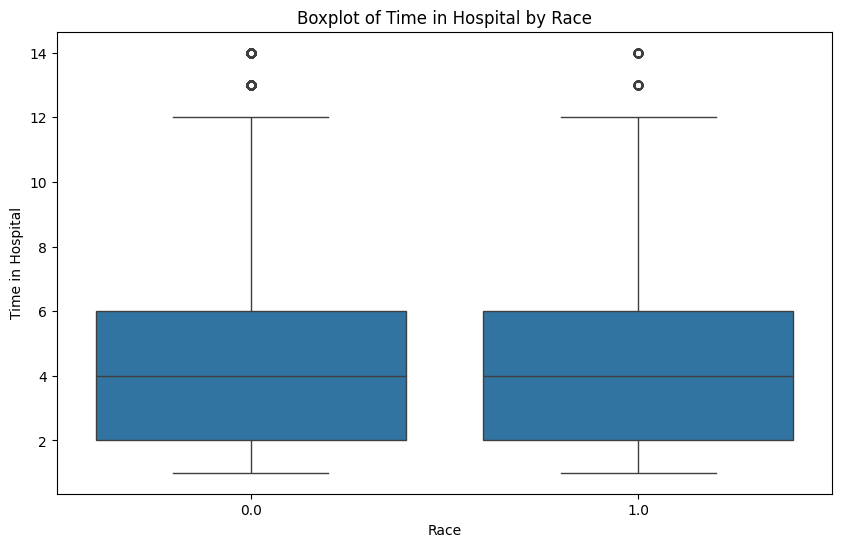

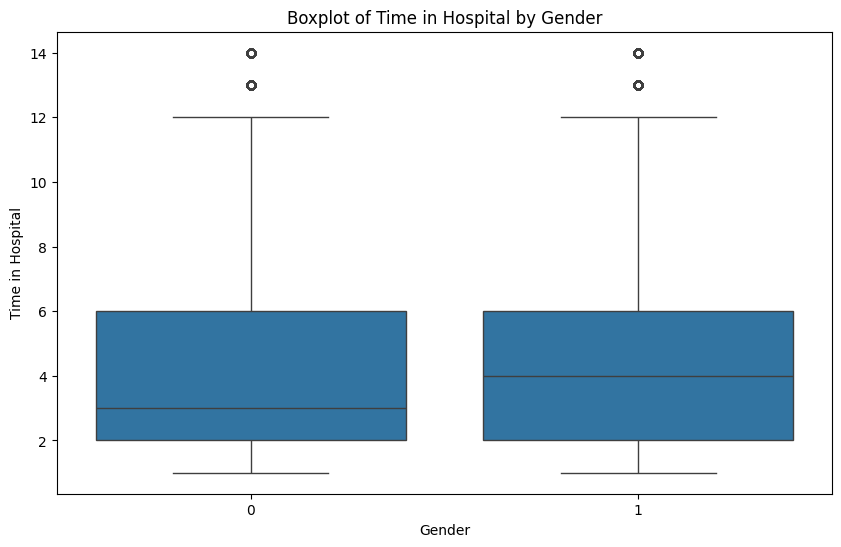

In [ ]:
# Boxplot for time_in_hospital across race
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='time_in_hospital', data=df)
plt.title("Boxplot of Time in Hospital by Race")
plt.xlabel("Race")
plt.ylabel("Time in Hospital")
plt.show()

# Boxplot for time_in_hospital across gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='time_in_hospital', data=df)
plt.title("Boxplot of Time in Hospital by Gender")
plt.xlabel("Gender")
plt.ylabel('Time in Hospital')
plt.show()

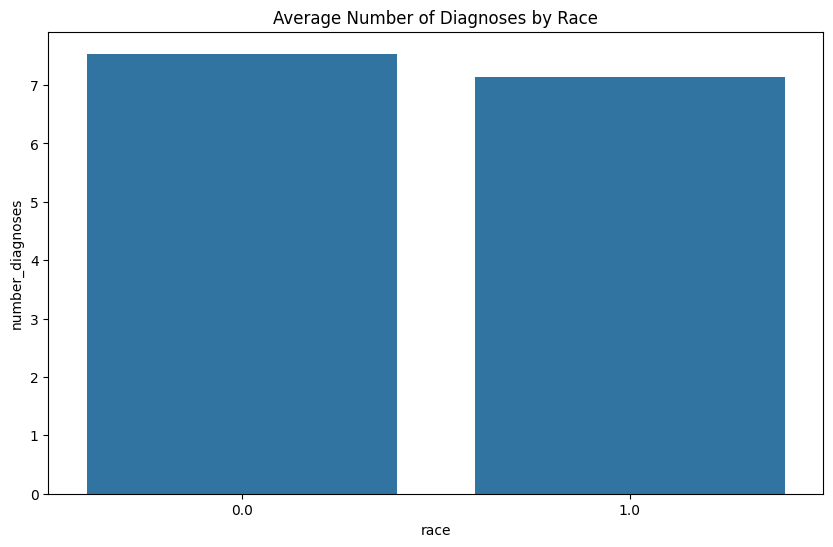

In [ ]:
# Barplot of average number of diagnoses by race
plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='number_diagnoses', data=df, errorbar=None)
plt.title("Average Number of Diagnoses by Race")
plt.show()

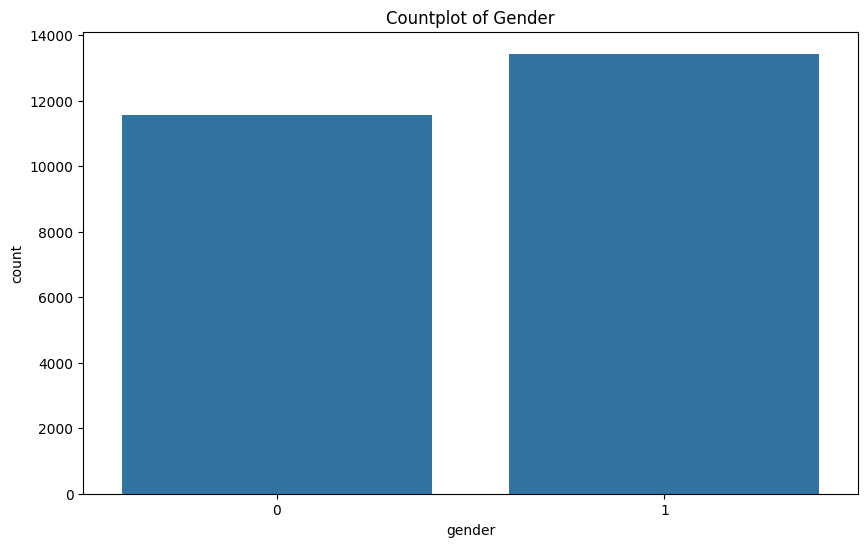

In [ ]:
# countplot for distirubtion of gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df)
plt.title("Countplot of Gender")
plt.show()

In [ ]:
df.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
       'tolbutamide_No', 'pioglitazone_No', 'rosiglitazone_No', 'acarbose

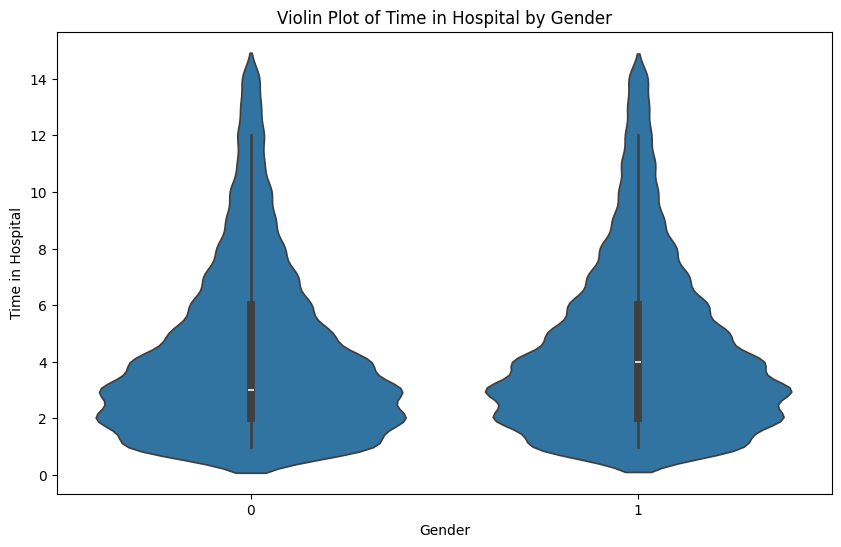

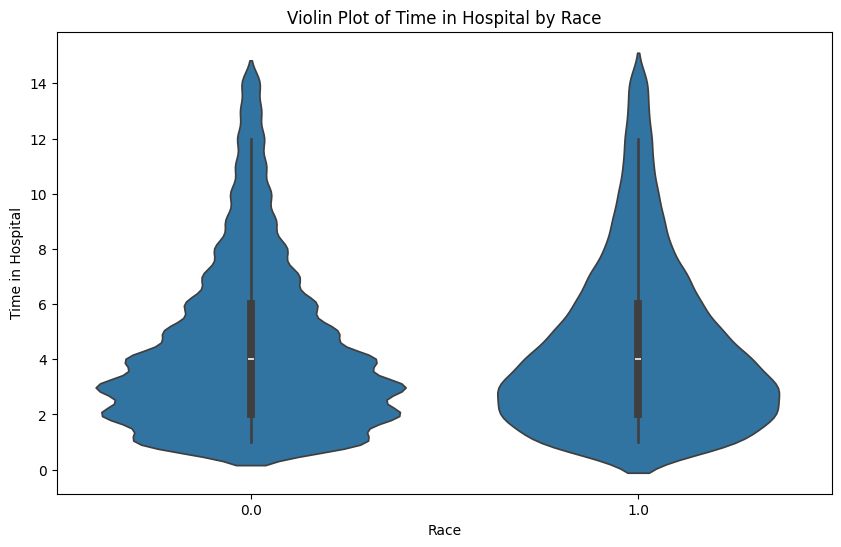

In [ ]:
# Violin plot for time_in_hospital across gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='time_in_hospital', data=df)
plt.title("Violin Plot of Time in Hospital by Gender")
plt.xlabel("Gender")
plt.ylabel("Time in Hospital")
plt.show()

# Violin plot for time_in_hospital across race
plt.figure(figsize=(10, 6))
sns.violinplot(x='race', y='time_in_hospital', data=df)
plt.title("Violin Plot of Time in Hospital by Race")
plt.xlabel("Race")
plt.ylabel("Time in Hospital")
plt.show()

# **Preprocessing -> Pipeline**
## Regression -> Classification Models

In [ ]:
# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingRegressor

In [ ]:
# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [ ]:
# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
# Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, mean_squared_error, r2_score

**Define Features and Targets**

In [ ]:
# Seperate Target variables
y_reg = df['time_in_hospital']
y_clf = df['readmitted']

In [ ]:
# Drop target variables from features
X_reg = df.drop(['time_in_hospital', 'readmitted'], axis=1)
X_clf = df.drop(['readmitted'], axis=1)

In [ ]:
# Identify numerical columns
numerical_cols_reg = X_reg.select_dtypes(include=np.number).columns.tolist()
numerical_cols_clf = X_clf.select_dtypes(include=np.number).columns.tolist()

# Identify categorical columns
categorical_cols_reg = X_reg.select_dtypes(include='object').columns.tolist()
categorical_cols_clf = X_clf.select_dtypes(include='object').columns.tolist()

In [ ]:
# Print Numerical columns
print(f"Numerical columns for Regression: {numerical_cols_reg}")
print(f"Numerical columns for Classification: {numerical_cols_clf}")

# Categorical columns is the same for reg and clf
print(f"Categorical columns: {categorical_cols_reg}")

Numerical columns for Regression: ['num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses']
Numerical columns for Classification: ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses']
Categorical columns: []


In [ ]:
# Split the Data into Training and Testing Sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

**Outlier Detection and Treatment**

In [ ]:
from sklearn.covariance import EllipticEnvelope

# Detect outleirs in numerical features
outlier_detector = EllipticEnvelope(contamination=0.01, random_state=42)
outlier_detector.fit(X_train_reg[numerical_cols_reg])

# Idnetify outliers (reg)
outliers = outlier_detector.predict(X_train_reg[numerical_cols_reg]) == -1
print(f"Number of outliers: {outliers.sum()}")

# Remove outliers
X_train_reg = X_train_reg[~outliers]
y_train_reg = y_train_reg[~outliers]

Number of outliers: 200


In [ ]:
# Detect outliers in classification features
outlier_detector = EllipticEnvelope(contamination=0.01, random_state=42)
outlier_detector.fit(X_train_clf[numerical_cols_clf])

# Identify outliers( clf)
outliers = outlier_detector.predict(X_train_clf[numerical_cols_clf]) == -1
print(f"Number of outliers: {outliers.sum()}")

# Remove outliers
X_train_clf = X_train_clf[~outliers]
y_train_clf = y_train_clf[~outliers]

Number of outliers: 200


In [ ]:
# Oversampling the Minority Class - using methods like SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_clf, y_train_clf)

readmitted
0    13590
1    11410
Name: count, dtype: int64


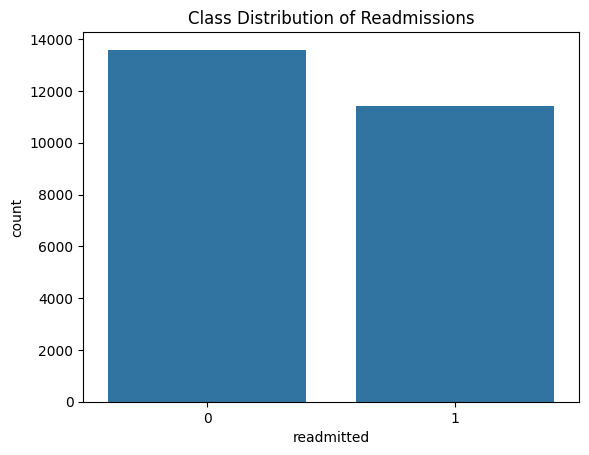

In [ ]:
# check class distirubtion
class_counts = df['readmitted'].value_counts()
print(class_counts)

# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='readmitted', data=df)
plt.title('Class Distribution of Readmissions')
plt.show()

In [ ]:
# Majority Class Predictor
majority_class = df['readmitted'].mode()[0]
baseline_accuracy = (df['readmitted'] == majority_class).mean()
print(f"Baseline Accuracy: {baseline_accuracy}")

Baseline Accuracy: 0.5436


**StandardScaler() and OneHotEncoder() the data should come after splitting the data between training and test set, because the test set plays the role of fresh unseen data, so it's not supposed to be accessible at the training stage. Using any information comign from the test set before or during training is a potential bias in the evaluation of the performance.**

In [ ]:
# Numerical Pipeline: Impute missing values -> scale
numerical_pipeline= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical Pipeline: Impute missing values, then encode
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine Numerical and Categorical Pipelines into a ColumnTransformer
preprocessing_pipeline = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols_reg),
    ('cat', categorical_pipeline, categorical_cols_reg)
])

In [ ]:
# Regression pipeline
regression_pipeline = Pipeline(steps=[
    ('num_pipeline', preprocessing_pipeline),
    ('pca', PCA(n_components=0.95, random_state=42)), # Retain 95% variance
    ('model', LinearRegression())
])

ridge_pipeline = Pipeline(steps=[
    ('num_pipeline', preprocessing_pipeline),
    ('ridge', Ridge())
])

lasso_pipeline = Pipeline(steps=[
    ('num_pipeline', preprocessing_pipeline),
    ('lasso', Lasso())
])

elastic_net_pipeline = Pipeline(steps=[
    ('num_pipeline', preprocessing_pipeline),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('elastic_net', ElasticNet())
])

regression_pipeline = VotingRegressor([
    ('model', regression_pipeline),
    ('ridge', ridge_pipeline),
    ('lasso', lasso_pipeline),
    ('elastic_net', elastic_net_pipeline)
])

In [ ]:
reg_param_grid = [
    {
        'model': [LinearRegression()],
        'model__fit_intercept': [True, False],
        'model__n_jobs': [1, 2, 5]
    },
    {
        'model': [Ridge()],
        'model__alpha': [0.1, 1.0, 10.0],
        'model__fit_intercept': [True, False]
    },
    {
        'model': [Lasso()],
        'model__alpha': [0.1, 1.0, 10.0],
        'model__fit_intercept': [True, False],
    },
    {
        'model': [ElasticNet()],
        'model__alpha': [0.1, 1.0, 10.0],
        'model__l1_ratio': [0.2, 0.5, 0.8],
        'model__fit_intercept': [True, False],
    }
]

In [ ]:
reg_grid_search = GridSearchCV(
    estimator=regression_pipeline,
    param_grid=reg_param_grid,
    cv=5, # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

reg_grid_search.fit(X_train_reg, y_train_reg)
print(f"Best parameters: {reg_grid_search.best_params_}")
print(f"Best CV Score (Neg MSE): {reg_grid_search.best_score_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'model': LinearRegression(), 'model__fit_intercept': True, 'model__n_jobs': 1}
Best CV Score (Neg MSE): -6.637696601935477


# **Evaluating the Best Regression Model**

Regression Model Evaluation: 

mean Squared Error (MSE): 6.518000688112619
R-squared (R²): 0.2679199608921694


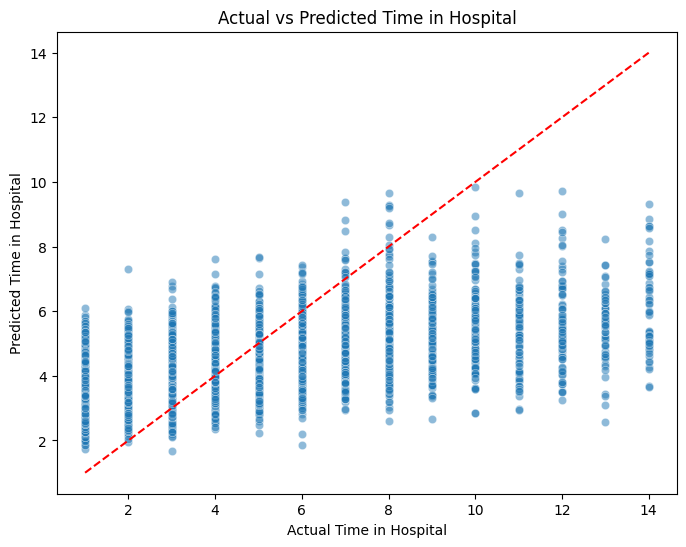

In [ ]:
# Best regression model
best_reg_model = reg_grid_search.best_estimator_

# Predict on test data
y_pred_reg = best_reg_model.predict(X_test_reg)

# Evaluation metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print("Regression Model Evaluation: \n")
print(f"mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.5)
plt.xlabel("Actual Time in Hospital")
plt.ylabel('Predicted Time in Hospital')
plt.title('Actual vs Predicted Time in Hospital')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.show()

# **Classification Models**

In [ ]:
# Numerical Pipeline: Impute missing values -> scale
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical Pipeline: Impute missing values, then encode
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine Numerical and Categorical Pipelines into a ColumnTransformer
preprocessing_pipeline = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols_clf),
    ('cat', categorical_pipeline, categorical_cols_clf)
])

In [ ]:
# Logistic Regression Pipeline
logistic_pipeline = Pipeline(steps=[
    ('pipeline', preprocessing_pipeline),
    ('model', LogisticRegression())
])

# Decision Tree Classifier Pipeline
decision_tree_clf_pipeline = Pipeline(steps=[
    ('pipeline', preprocessing_pipeline),
    ('decision_tree_clf', DecisionTreeClassifier())
])

# Random Forest Classifier Pipeline
random_forest_clf_pipeline = Pipeline(steps=[
    ('pipeline', preprocessing_pipeline),
    ('random_forest_clf', RandomForestClassifier())
])

# K-Neighbors Classifier Pipeline
k_neighbors_clf_pipeline = Pipeline(steps=[
    ('pipeline', preprocessing_pipeline),
    ('k_neighbors_clf', KNeighborsClassifier())
])

# Gradient-Boosting Pipeline
gradient_boosting_clf_pipeline = Pipeline(steps=[
    ('pipeline', preprocessing_pipeline),
    ('gradient_boosting_clf', GradientBoostingClassifier())
])

# XGBoost Classifier Pipeline
xgboost_clf_pipeline = Pipeline(steps=[
    ('pipeline', preprocessing_pipeline),
    ('xgboost_clf', XGBClassifier())
])

# Create an estimators list with the name of all the pipelines
estimators = [logistic_pipeline, decision_tree_clf_pipeline, random_forest_clf_pipeline, k_neighbors_clf_pipeline, gradient_boosting_clf_pipeline, xgboost_clf_pipeline]

## Classification param_grids

In [ ]:
# Logistic Classification grid
clf_param_grid_logistic = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
}

# Decision Tree grid
# Make sure the decision_tree_clf__[feature] is the same as the name of the step of the classifier in the pipeline
clf_param_grid_decision_tree = {
    'decision_tree_clf__criterion': [None, 'gini', 'entropy'],
    'decision_tree_clf__max_depth': [None, 10, 20],
    'decision_tree_clf__min_samples_split': [None, 2, 5, 10],
    'decision_tree_clf__min_samples_leaf': [None, 1, 2, 4],
    'decision_tree_clf__max_features': [None, 'auto', 'sqrt', 'log2'],
}

# Random Forest grid
# Make sure the random_forest_clf__[feature] is the same as the name of the step of the classifier in the pipeline
clf_param_grid_random_forest = {
    'random_forest_clf__n_estimators': [None, 50, 100, 200],
    'random_forest_clf__max_depth': [None, 10, 20],
    'random_forest_clf__min_samples_split': [None, 2, 5, 10]
}

# K-Nieghbors grid
clf_param_grid_k_neighbors = {
    'k_neighbors_clf__n_neighbors': [None, 3, 5, 7],
    'k_neighbors_clf__weights': [None, 'uniform', 'distance'],
}

# Gradient Boosting grid
clf_param_grid_gradient_boosting = {
    # Make sure the name is the same as the name of the step of the classifier in the pipeline so the RandomizedSearchCV
    # Knows what to apply the parameters to
    'gradient_boosting_clf__n_estimators': [None, 50, 100, 200],
    'gradient_boosting_clf__learning_rate': [None, 0.01, 0.1, 1],
}

# XGBoost grid
clf_param_grid_xgboost = {
    'xgboost_clf__n_estimators': [None, 50, 100, 200],
    'xgboost_clf__max_depth': [None, 3, 5, 7],
    'xgboost_clf__max_depth': [None, 3, 6, 10],
}

param_grids = [
    clf_param_grid_logistic,
    clf_param_grid_decision_tree,
    clf_param_grid_random_forest,
    clf_param_grid_k_neighbors,
    clf_param_grid_gradient_boosting,
    clf_param_grid_xgboost
]

## **Use RandomizedSearchCV in a for loop, to reduce lag**

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best parameters: {'model__penalty': 'l2'}
Best Score: 0.3952643171806167
Classification Model Evaluation:               precision    recall  f1-score   support

           0       0.59      0.71      0.64      2731
           1       0.53      0.40      0.46      2269

    accuracy                           0.57      5000
   macro avg       0.56      0.55      0.55      5000
weighted avg       0.56      0.57      0.56      5000



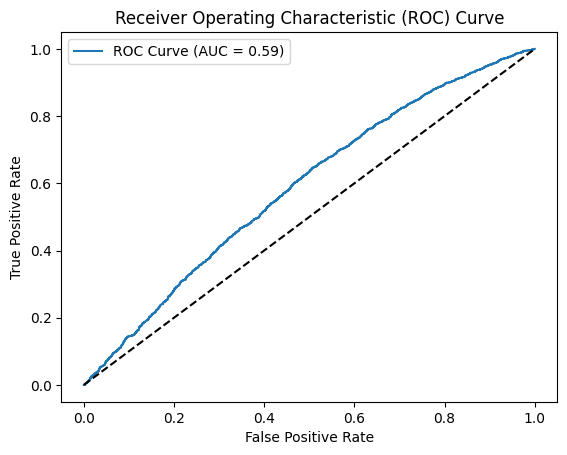

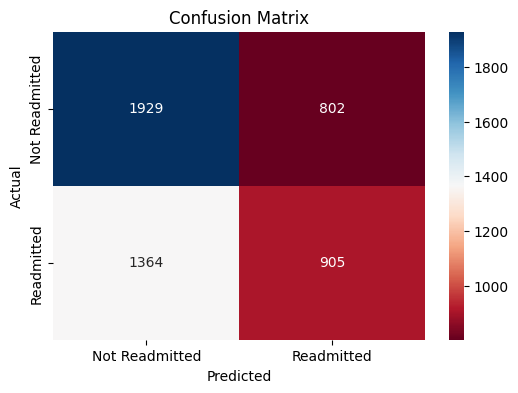

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best parameters: {'decision_tree_clf__min_samples_split': 5, 'decision_tree_clf__min_samples_leaf': 4, 'decision_tree_clf__max_features': None, 'decision_tree_clf__max_depth': 10, 'decision_tree_clf__criterion': 'gini'}
Best Score: 0.48061674008810573
Classification Model Evaluation:               precision    recall  f1-score   support

           0       0.61      0.52      0.56      2731
           1       0.51      0.60      0.55      2269

    accuracy                           0.56      5000
   macro avg       0.56      0.56      0.56      5000
weighted avg       0.57      0.56      0.56      5000



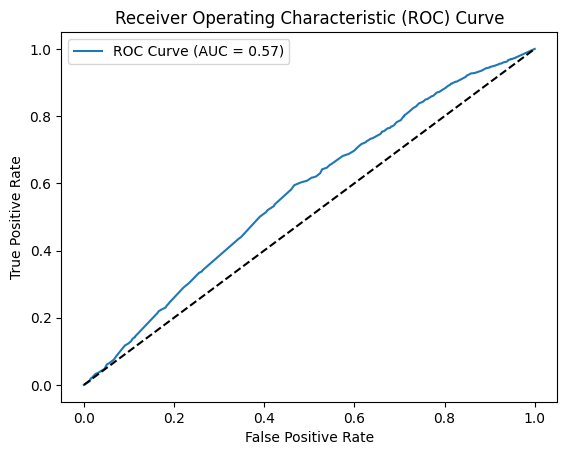

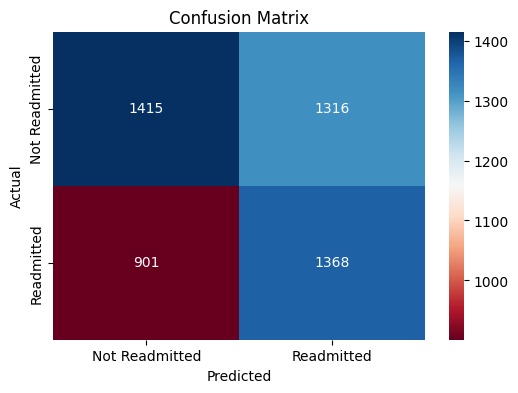

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best parameters: {'random_forest_clf__n_estimators': 200, 'random_forest_clf__min_samples_split': 5, 'random_forest_clf__max_depth': 10}
Best Score: 0.48887665198237884
Classification Model Evaluation:               precision    recall  f1-score   support

           0       0.61      0.65      0.63      2731
           1       0.54      0.49      0.51      2269

    accuracy                           0.58      5000
   macro avg       0.57      0.57      0.57      5000
weighted avg       0.57      0.58      0.57      5000



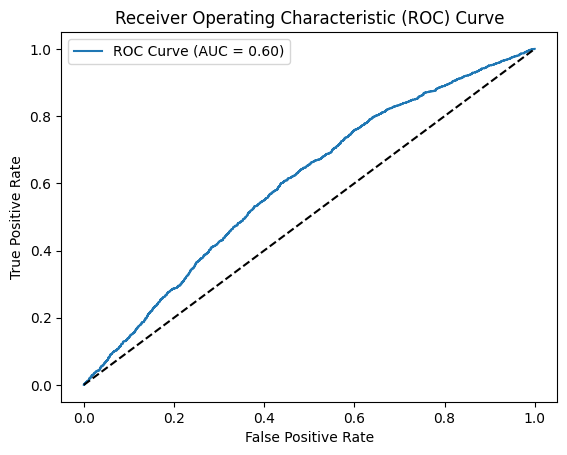

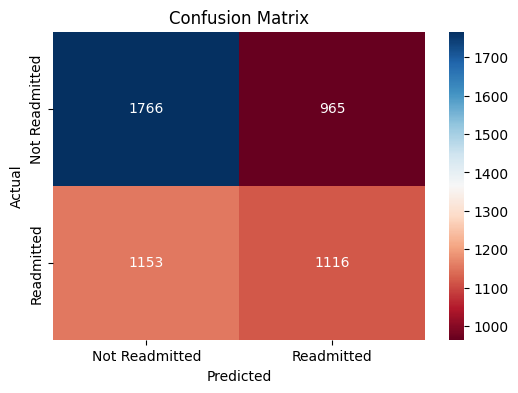

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best parameters: {'k_neighbors_clf__weights': 'distance', 'k_neighbors_clf__n_neighbors': 3}
Best Score: 0.46696035242290745
Classification Model Evaluation:               precision    recall  f1-score   support

           0       0.57      0.59      0.58      2731
           1       0.49      0.47      0.48      2269

    accuracy                           0.54      5000
   macro avg       0.53      0.53      0.53      5000
weighted avg       0.54      0.54      0.54      5000



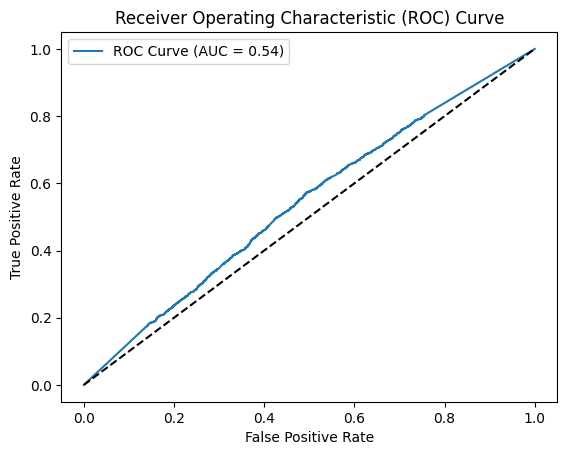

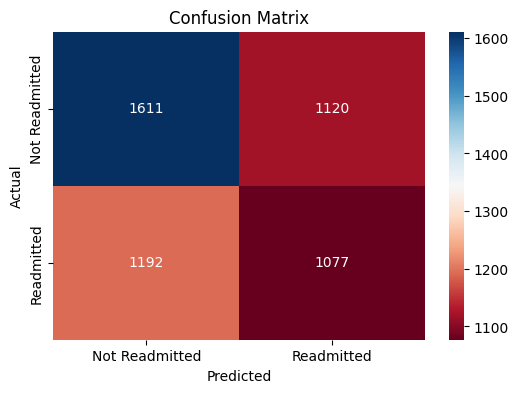

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best parameters: {'gradient_boosting_clf__n_estimators': 100, 'gradient_boosting_clf__learning_rate': 1}
Best Score: 0.4708149779735683
Classification Model Evaluation:               precision    recall  f1-score   support

           0       0.59      0.65      0.62      2731
           1       0.52      0.46      0.48      2269

    accuracy                           0.56      5000
   macro avg       0.55      0.55      0.55      5000
weighted avg       0.56      0.56      0.56      5000



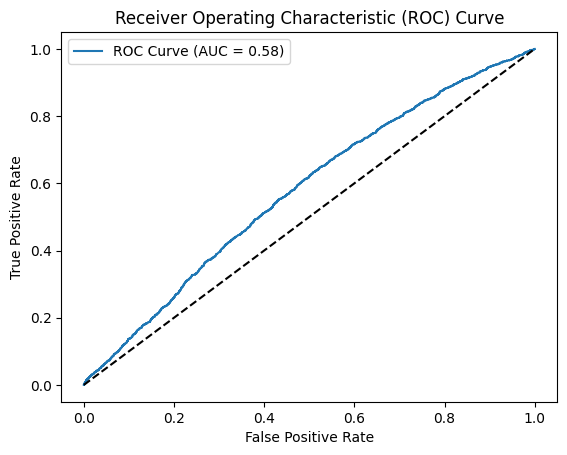

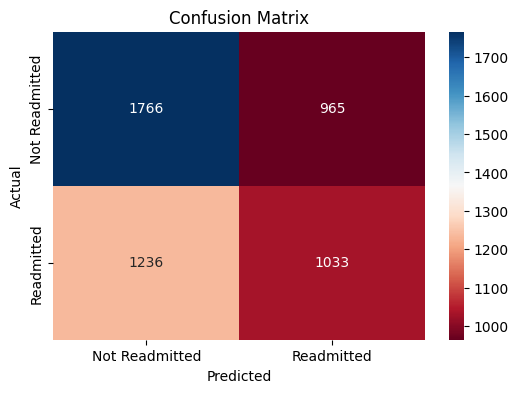

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best parameters: {'xgboost_clf__n_estimators': 50, 'xgboost_clf__max_depth': None}
Best Score: 0.47709251101321587
Classification Model Evaluation:               precision    recall  f1-score   support

           0       0.59      0.64      0.62      2731
           1       0.52      0.47      0.50      2269

    accuracy                           0.57      5000
   macro avg       0.56      0.56      0.56      5000
weighted avg       0.56      0.57      0.56      5000



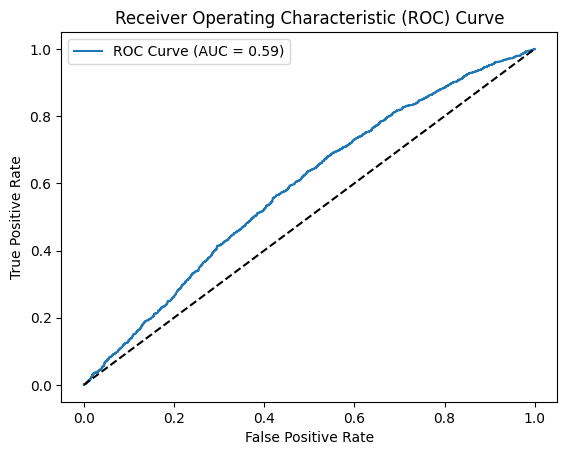

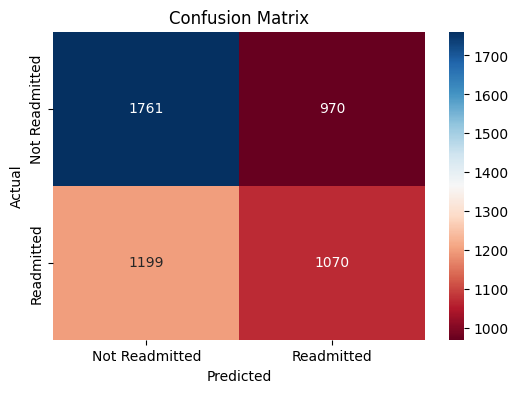

In [ ]:
# Use a for loop to RandomizedSearchCV over estimators & param_grids
# Use zip to parse both lists
for estimator, param_grid in zip(estimators, param_grids):

    clf_random_search = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=param_grid,
        n_iter=5, # Number of parameters to test
        cv=2, # 2-fold cross-validation
        scoring='recall', # Recall is more important since minimizing false negatives is crucial
        n_jobs=2,
        verbose=2,
        random_state=42
    )

    # Fit the model
    clf_random_search.fit(X_train_clf, y_train_clf)

    # Best classification parameters and Recall Score
    print(f"Best parameters: {clf_random_search.best_params_}")
    print(f"Best Score: {clf_random_search.best_score_}")

    # y_pred_clf
    y_pred_clf = clf_random_search.predict(X_test_clf)

    # evaluation metrics
    print(f"Classification Model Evaluation: {classification_report(y_test_clf, y_pred_clf)}")

    # ROC-AUC Score
    from sklearn.metrics import roc_auc_score, roc_curve

    # Ensure classifier can predict probabilities
    y_pred_proba = clf_random_search.best_estimator_.predict_proba(X_test_clf)[:, 1]
    roc_auc = roc_auc_score(y_test_clf, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test_clf, y_pred_proba)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--') # Diagnol line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    # Confusion Matrix
    conf_mat = confusion_matrix(y_test_clf, y_pred_clf)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='RdBu',
                xticklabels=['Not Readmitted', 'Readmitted'],
                yticklabels=['Not Readmitted', 'Readmitted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()